# PROJEKT 01 - lineare regression mit Tensorflow


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## 1.1 - Datengenerierung und Visualisierung

In [0]:
np.random.seed(42) # für gleiche Zufallswerte

my_weight = 4 # später vom modell geändert

# Ein array von 100 Werten wird generiert
input = np.arange(0, 10, 0.1)
noise = np.random.randint(low=-5, high=5, size=input.shape)

# Damit die Ausgabewerte nicht nur linear sind werden Zufallswerte hinzugefügt
output = my_weight * input + noise

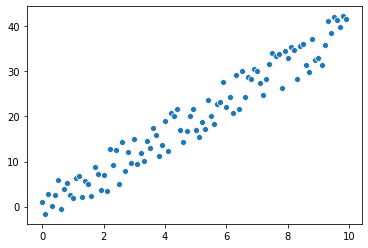

In [4]:
sns.scatterplot(input, output)

## 1.2 - Modell erstellen

In [0]:
def linear_regression_model(X, w, b):
  return tf.add(tf.multiply(X, w), b)

In [0]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

w = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="bias")

In [0]:
cost = tf.square(Y - linear_regression_model(X, w, b))

In [0]:
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

## 1.3 - Model trainieren

In [10]:
epochs = range(0,100)

recording = {"w":[], "b":[]}

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in epochs:
    for (x,y) in zip(input, output):
      sess.run(train_op, feed_dict={X:x, Y:y})
    # Gewichtungen und bias werden berechnet
    weight_value = sess.run(w)
    bias_value = sess.run(b)
    # Debug output
    recording["w"] += [weight_value]
    recording["b"] += [bias_value]
    print('Epoch {0}/{1} --- weight: {2} - bias: {3}'.format(i, len(epochs), weight_value, bias_value))

Epoch 0/100 --- weight: 3.927600860595703 - bias: 1.9941253662109375
Epoch 1/100 --- weight: 3.9774057865142822 - bias: 1.498550295829773
Epoch 2/100 --- weight: 4.016592979431152 - bias: 1.108627200126648
Epoch 3/100 --- weight: 4.047425746917725 - bias: 0.8018314242362976
Epoch 4/100 --- weight: 4.071684837341309 - bias: 0.5604418516159058
Epoch 5/100 --- weight: 4.090773582458496 - bias: 0.37051430344581604
Epoch 6/100 --- weight: 4.105792045593262 - bias: 0.22107753157615662
Epoch 7/100 --- weight: 4.117609024047852 - bias: 0.10349871218204498
Epoch 8/100 --- weight: 4.126906394958496 - bias: 0.010986880399286747
Epoch 9/100 --- weight: 4.134220600128174 - bias: -0.061802707612514496
Epoch 10/100 --- weight: 4.139976501464844 - bias: -0.11907341331243515
Epoch 11/100 --- weight: 4.144505500793457 - bias: -0.16413486003875732
Epoch 12/100 --- weight: 4.148069858551025 - bias: -0.1995897740125656
Epoch 13/100 --- weight: 4.150871276855469 - bias: -0.22748687863349915
Epoch 14/100 ---

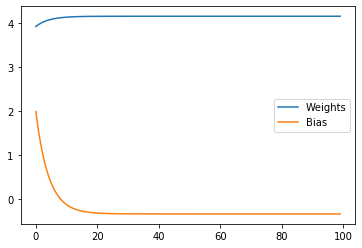

In [18]:
sns.lineplot(epochs, recording["w"], label="Weights")
sns.lineplot(epochs, recording["b"], label="Bias", legend='brief')

## 1.4 - Model benutzen und ergebnisse visualisieren

In [0]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in epochs:
    for (x,y) in zip(input, output):
      sess.run(train_op, feed_dict={X:x, Y:y})
    # Gewichtungen und bias werden berechnet
    weight_value = sess.run(w)
    bias_value = sess.run(b)
  predicted_output = sess.run(linear_regression_model(input, weight_value, bias_value))

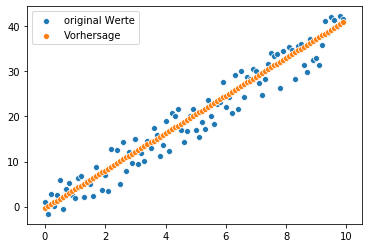

In [23]:
sns.scatterplot(input, output, label="original Werte")
sns.scatterplot(input, predicted_output, label="Vorhersage")